In [1]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train = X_train.reshape(60000,784)
X_train.shape

(60000, 784)

In [5]:
y_train = y_train.reshape(-1,1)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_test = X_test.reshape(10000, 784)

In [8]:
y_test = y_test.reshape(-1,1)

In [9]:
print(f'학습셋 이미지 수 : {X_train.shape[0]}개')
print(f'테스트셋 이미지 수 : {X_test.shape[0]}개')

학습셋 이미지 수 : 60000개
테스트셋 이미지 수 : 10000개


In [10]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories='auto')
enc.fit(y_train)

OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [11]:
y_train_onehot = enc.transform(y_train).toarray()
y_train_onehot = np.array(y_train_onehot, dtype = 'float32')

In [12]:
y_test_onehot = enc.transform(y_test).toarray()
y_test_onehot = np.array(y_test_onehot, dtype = 'float32')

In [13]:
model = Sequential()
model.add(Dense(200, input_dim = 784, activation='sigmoid'))
model.add(Dense(10, activation = 'softmax'))
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr=0.001), metrics=['acc'])

In [15]:
model.fit(X_train, y_train_onehot, epochs = 10, batch_size = 100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





60000/60000 [==============================] - 3s 44us/step - loss: 0.4931 - acc: 0.8673
Epoch 2/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.2900 - acc: 0.9186
Epoch 3/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.2592 - acc: 0.9251
Epoch 4/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.2428 - acc: 0.9300
Epoch 5/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.2306 - acc: 0.9329
Epoch 6/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.2219 - acc: 0.9350
Epoch 7/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.2133 - acc: 0.9377
Epoch 8/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.2120 - acc: 0.9377
Epoch 9/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.2039 - acc: 0.939

In [16]:
predict = model.predict(X_test)

In [17]:
predict01 = np.argmax(predict,1)
target = np.argmax(y_test_onehot, 1)

In [18]:
predict02 = (predict01 == target)
predict02

acc = np.sum(predict02) / len(predict02)
acc

0.9389

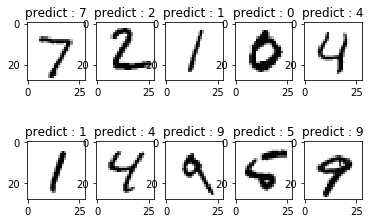

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
for i in range(10):
    subplot = fig.add_subplot(2, 5, i+1)
    # subplot.set_xticks([])
    # subplot.set_yticks([])
    subplot.set_title("predict : %d"%predict01[i])
    subplot.imshow(X_test[i].reshape((28, 28)), cmap=plt.cm.gray_r)
plt.show()